In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dynesty
import tqdm
from scipy.stats import uniform

# defining the first function
def func(time,theta):
    t0, b, A, alpha = theta
    return np.where(time < t0, b, b + A * np.exp(-alpha * (time - t0)))

# generating the priors for the nested sampling
def prior_transform(u):
    t0 = 0 + u[0] * 100
    b = 0 + u[1] * 50
    A = 0 + u[2] * 100
    alpha = np.exp(-5 + u[3] * 10)
    return [t0, b, A, alpha]

def log_likelihood(theta):
    return np.sum(-0.5 * np.log(2*np.pi*flux_err**2) - ((flux - func(time, theta))**2) / (2*flux_err**2))


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Flux')]

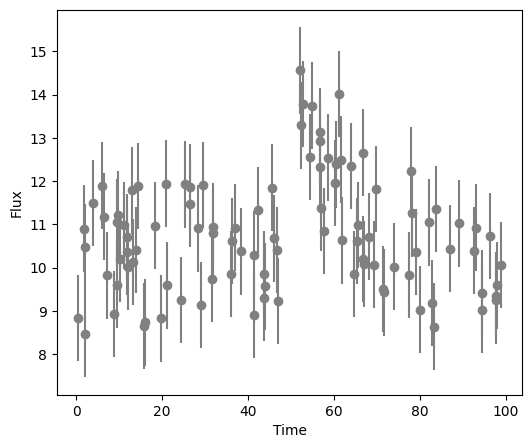

In [2]:
data=np.load('Datasets/transient.npy')
time=data[:,0]
flux=data[:,1]
flux_err=data[:,2]

fig,ax=plt.subplots(1,1,figsize=(6,5))
ax.errorbar(time,flux,yerr=flux_err,marker='o',color='grey',linestyle='')
ax.set(xlabel='Time',ylabel='Flux')

In [3]:
# processing the Nested Sampling
ndim = 4
sampler = dynesty.NestedSampler(log_likelihood, prior_transform, ndim)
sampler.run_nested()
results = sampler.results

/tmp/ipykernel_26031/1173367026.py:10: RuntimeWarning: overflow encountered in exp
  return np.where(time < t0, b, b + A * np.exp(-alpha * (time - t0)))
/tmp/ipykernel_26031/1173367026.py:10: RuntimeWarning: overflow encountered in multiply
  return np.where(time < t0, b, b + A * np.exp(-alpha * (time - t0)))
1772it [00:02, 323.75it/s, bound: 0 | nc: 1 | ncall: 17012 | eff(%): 10.416 | loglstar:   -inf < -309.490 <    inf | logz: -318.589 +/-  0.126 | dlogz: 140.548 >  0.509]     /tmp/ipykernel_26031/1173367026.py:10: RuntimeWarning: overflow encountered in exp
  return np.where(time < t0, b, b + A * np.exp(-alpha * (time - t0)))
/tmp/ipykernel_26031/1173367026.py:10: RuntimeWarning: overflow encountered in multiply
  return np.where(time < t0, b, b + A * np.exp(-alpha * (time - t0)))
1914it [00:03, 266.58it/s, bound: 1 | nc: 2 | ncall: 18543 | eff(%): 10.322 | loglstar:   -inf < -259.162 <    inf | logz: -267.698 +/-  0.126 | dlogz: 94.291 >  0.509]  /tmp/ipykernel_26031/1173367026.py

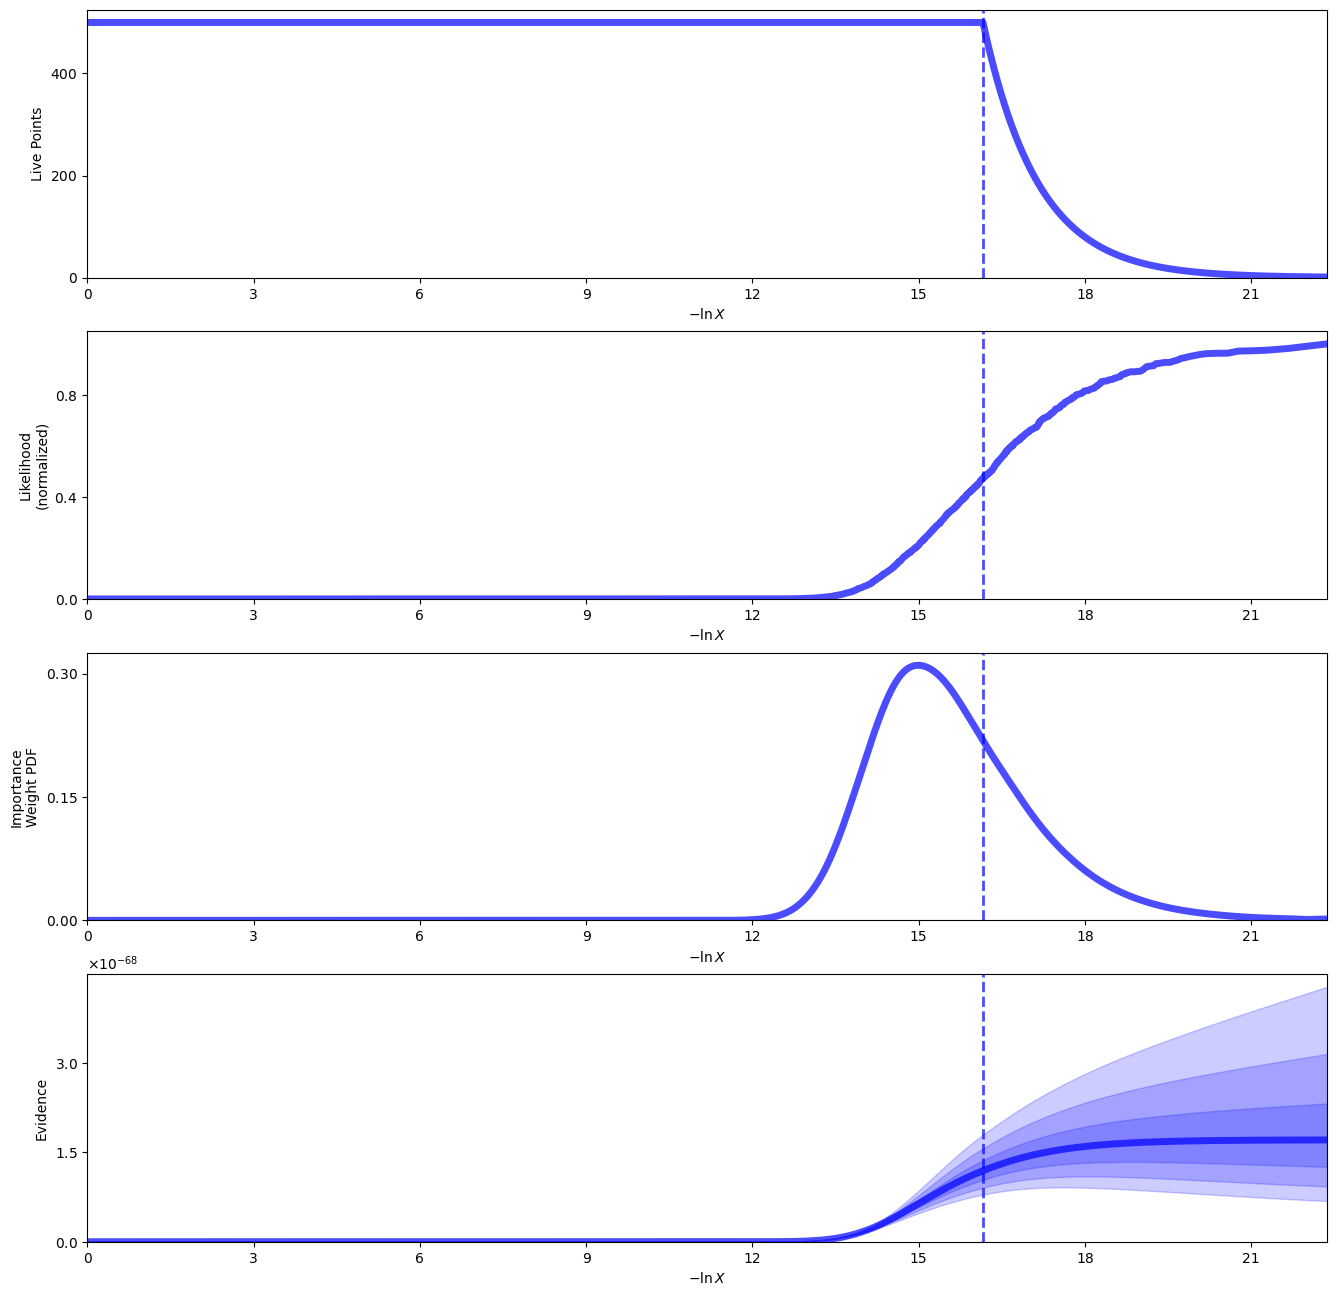

In [4]:
from dynesty import plotting as dyplot
# seeing the results
rfig, raxes = dyplot.runplot(results)

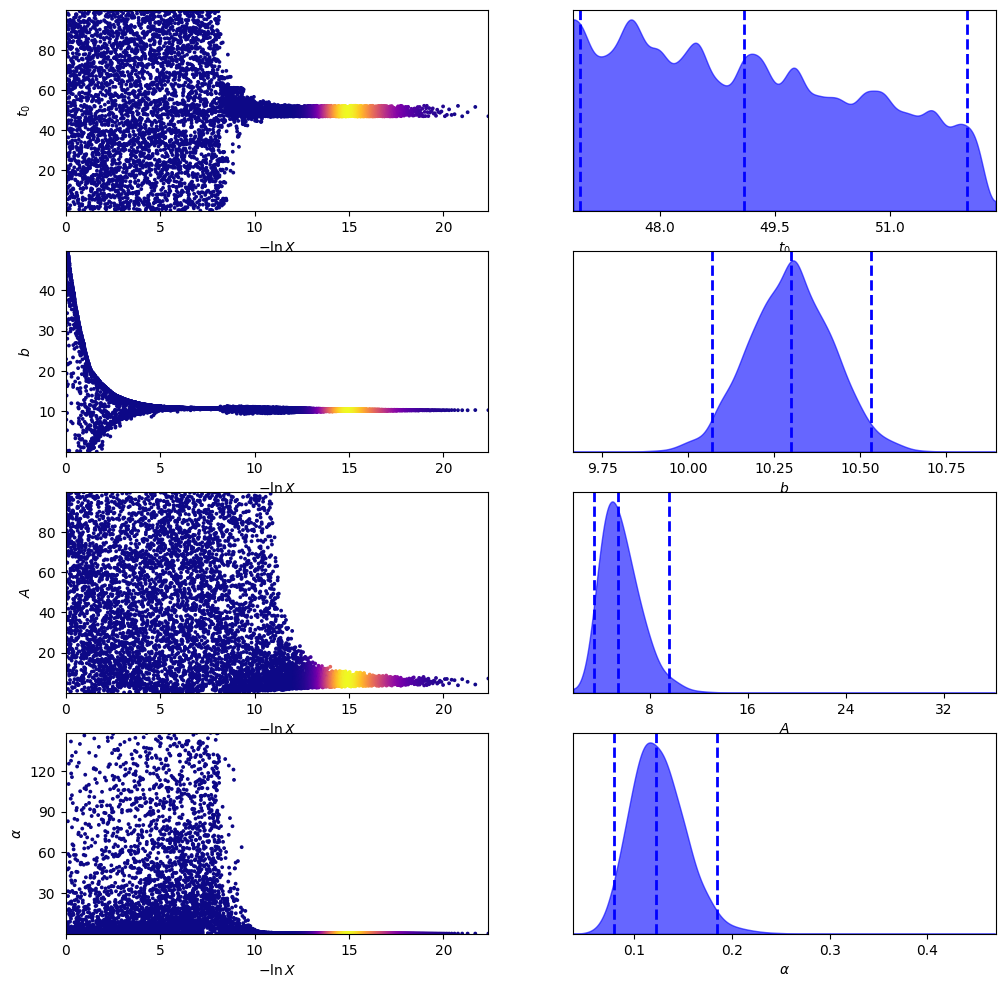

In [5]:
# plotting the traceplots
labels = ["$t_0$", "$b$", "$A$", r"$\alpha$"]
tfig, taxes = dyplot.traceplot(results,labels=labels)

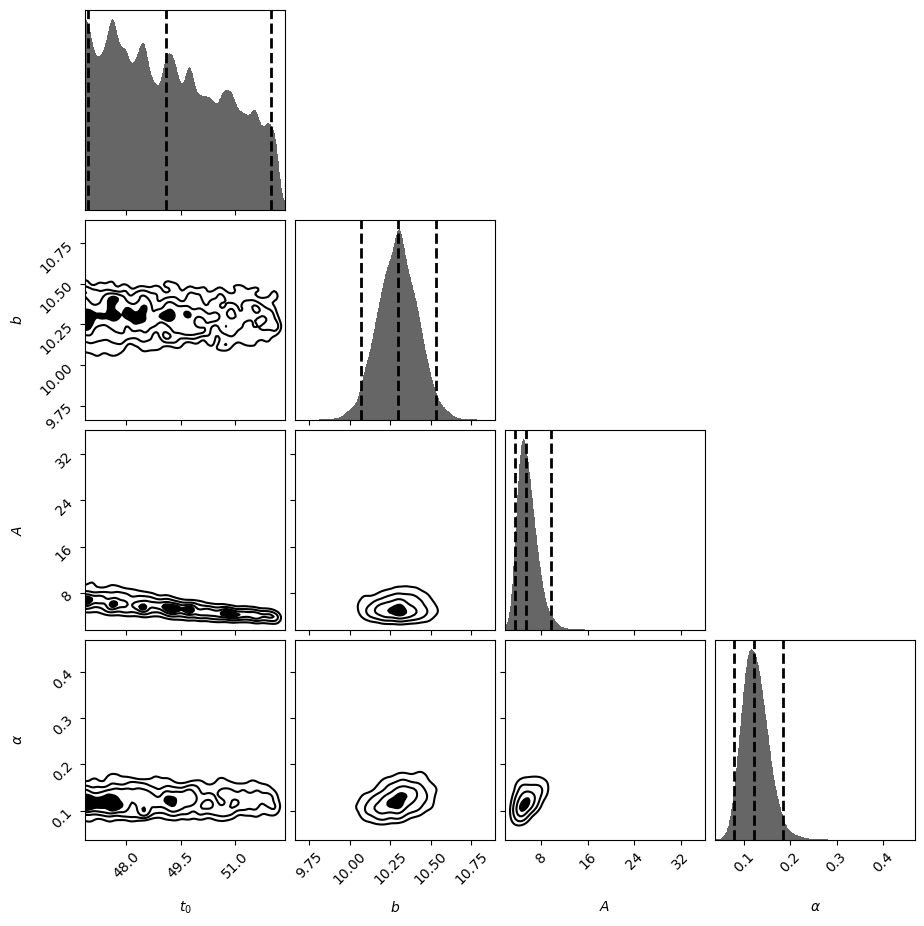

In [6]:
# corner plot for the parameters
cfig, caxes = dyplot.cornerplot(results,labels=labels)

In [7]:
from dynesty import utils as dyfunc

# Extract sampling results
samples = results.samples  # samples
weights = np.exp(results.logwt - results.logz[-1])  # normalized weights

evidence = results.logz[-1] #evidence
print(f'Bayesian evidence: {np.exp(evidence)}\nlog(Bayesian evidence): {evidence:.2f}')


quantiles = [dyfunc.quantile(samps, [0.16, 0.84], weights=weights)
             for samps in samples.T]
print('68% parameter credible regions are:\n ' + str(quantiles) + '\n')

mean, cov = dyfunc.mean_and_cov(samples, weights)
print('Mean and covariance of parameters are: ' + str(mean) + '\n' + str(cov))

Bayesian evidence: 1.70795687583649e-68
log(Bayesian evidence): -156.04
68% parameter credible regions are:
 [[47.5532972740232, 50.971880289512825], [10.175690015960896, 10.418772588041874], [4.19261425006311, 7.222359564641205], [0.09840481269968139, 0.1514053957327609]]

Mean and covariance of parameters are: [49.20824719 10.29703896  5.68303949  0.12513044]
[[ 2.25129515e+00 -3.00193862e-04 -1.58426071e+00  2.80741358e-05]
 [-3.00193862e-04  1.45209806e-02  1.02739272e-02  1.28078175e-03]
 [-1.58426071e+00  1.02739272e-02  2.52827860e+00  2.46000234e-02]
 [ 2.80741358e-05  1.28078175e-03  2.46000234e-02  7.63838229e-04]]


In [8]:
# defining the second function and repeating the same as before
def func2(t,theta):
    t0, b, A, sigma_w = theta
    return b + A * np.exp(-(t-t0)**2/(2*sigma_w**2))

def log_likelihood2(theta):
    return np.sum(-0.5 * np.log(2*np.pi*flux_err**2) - ((flux - func2(time, theta))**2) / (2*flux_err**2))

def prior_transform2(u):
    t0 = 0 + u[0] * 100
    b = 0 + u[1] * 50
    A = 0 + u[2] * 100
    sigma_w = np.exp(-5 + u[3] * 10)
    return [t0, b, A, sigma_w]

ndim = 4
sampler2 = dynesty.NestedSampler(log_likelihood2, prior_transform2, ndim)
sampler2.run_nested()
results2 = sampler2.results

4677it [01:28, 25.75it/s, bound: 151 | nc: 119 | ncall: 130099 | eff(%):  3.595 | loglstar:   -inf < -174.877 <    inf | logz: -184.865 +/-  0.118 | dlogz: 29.697 >  0.509]  /home/giacomo/myenv/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
4682it [01:29, 14.30it/s, bound: 153 | nc: 830 | ncall: 131156 | eff(%):  3.570 | loglstar:   -inf < -174.801 <    inf | logz: -184.845 +/-  0.118 | dlogz: 29.668 >  0.509]/home/giacomo/myenv/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. 

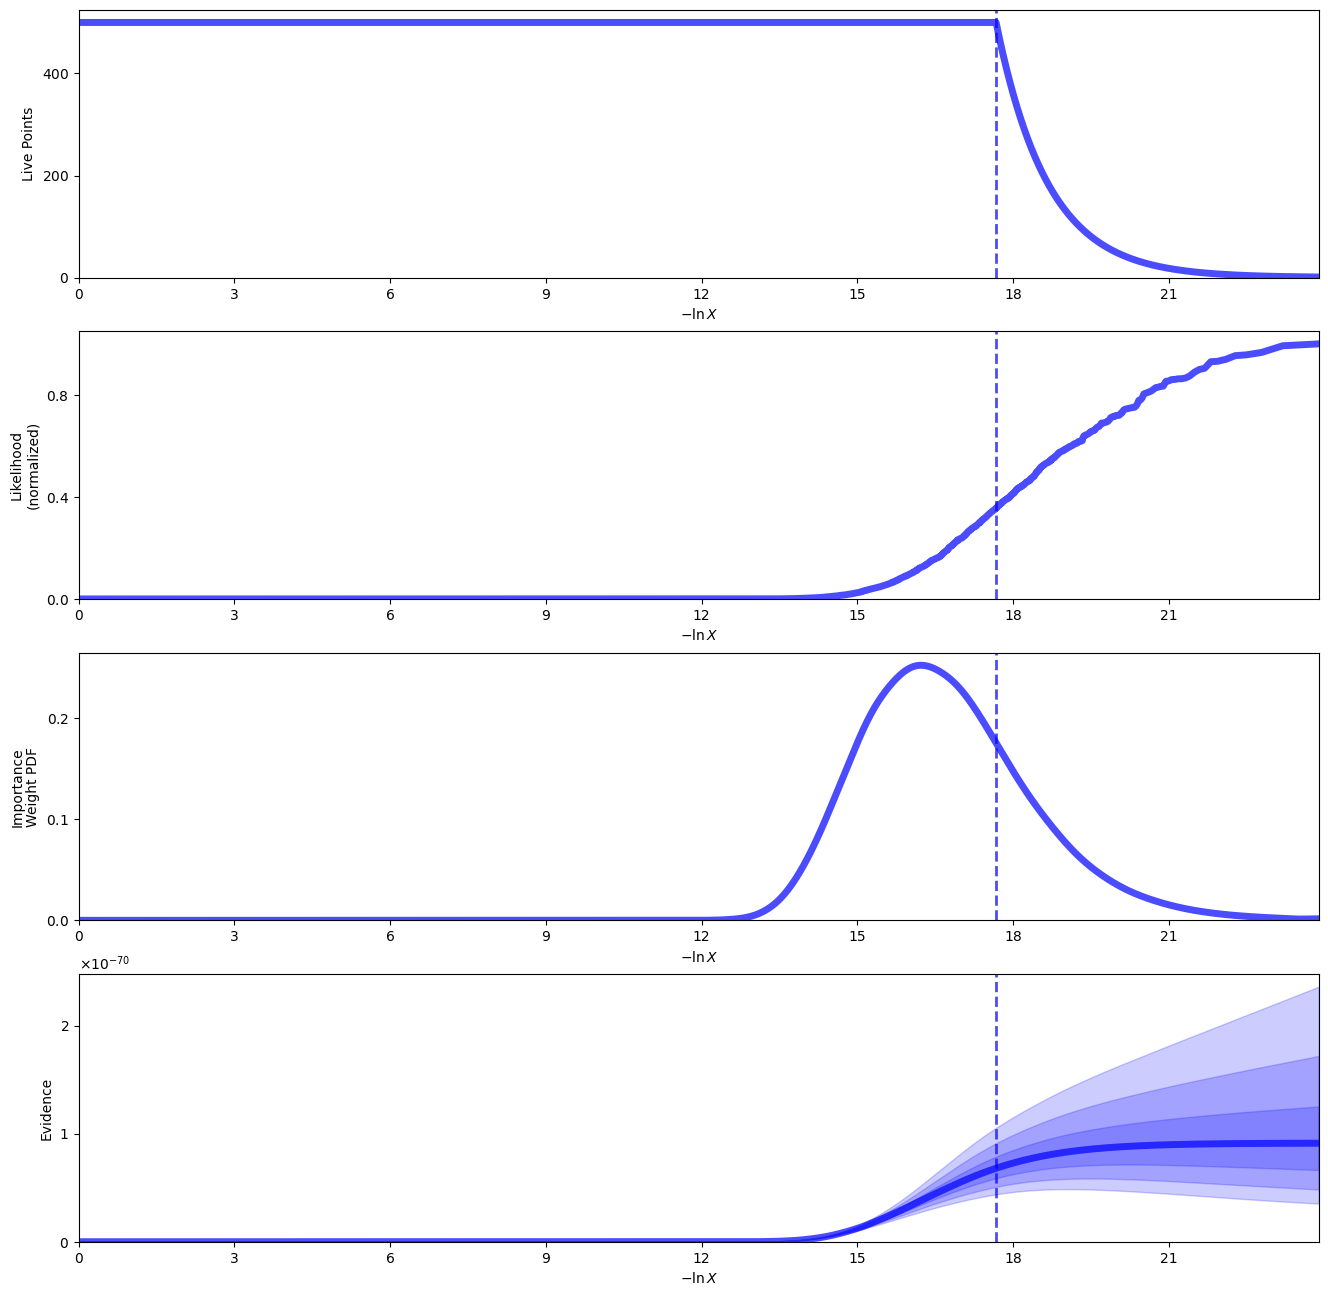

In [9]:
# seeing the results
rfig, raxes = dyplot.runplot(results2)

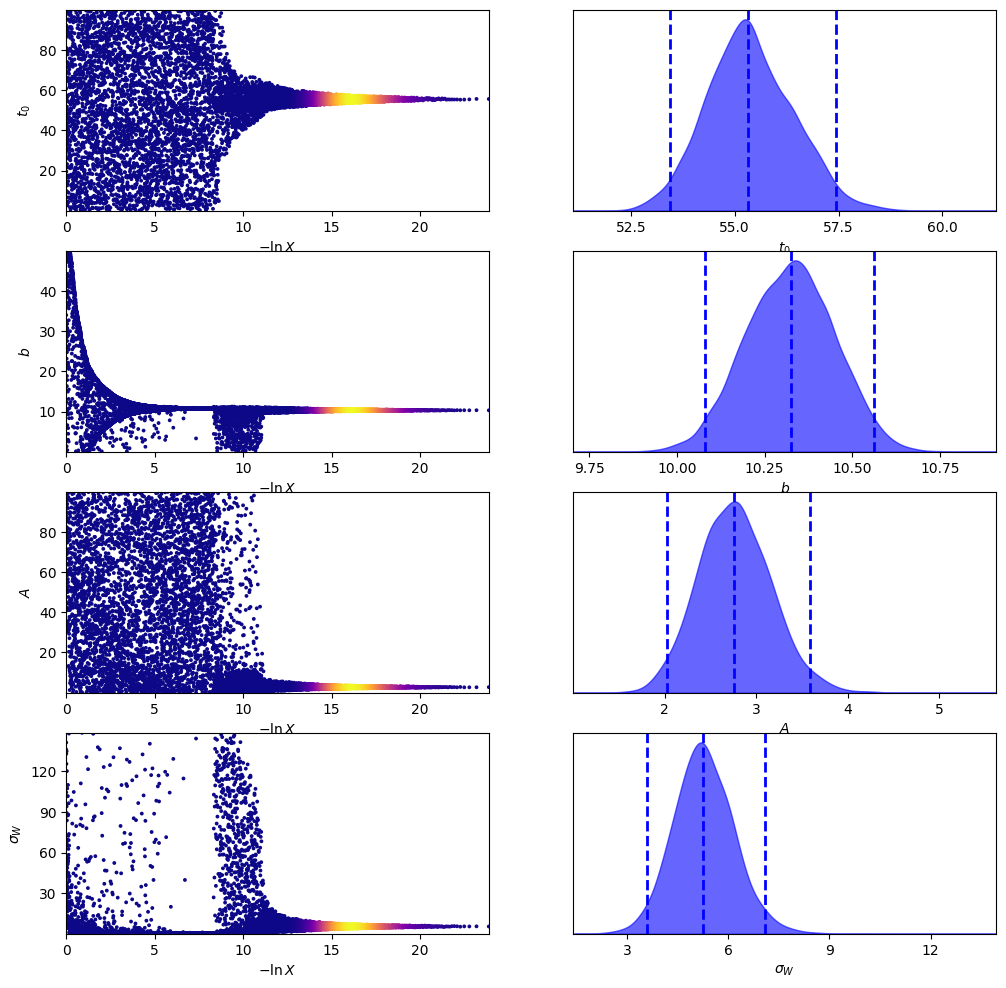

In [10]:
# plotting the traceplots
labels2 = ["$t_0$", "$b$", "$A$", r"$\sigma_W$"]
tfig, taxes = dyplot.traceplot(results2,labels=labels2)

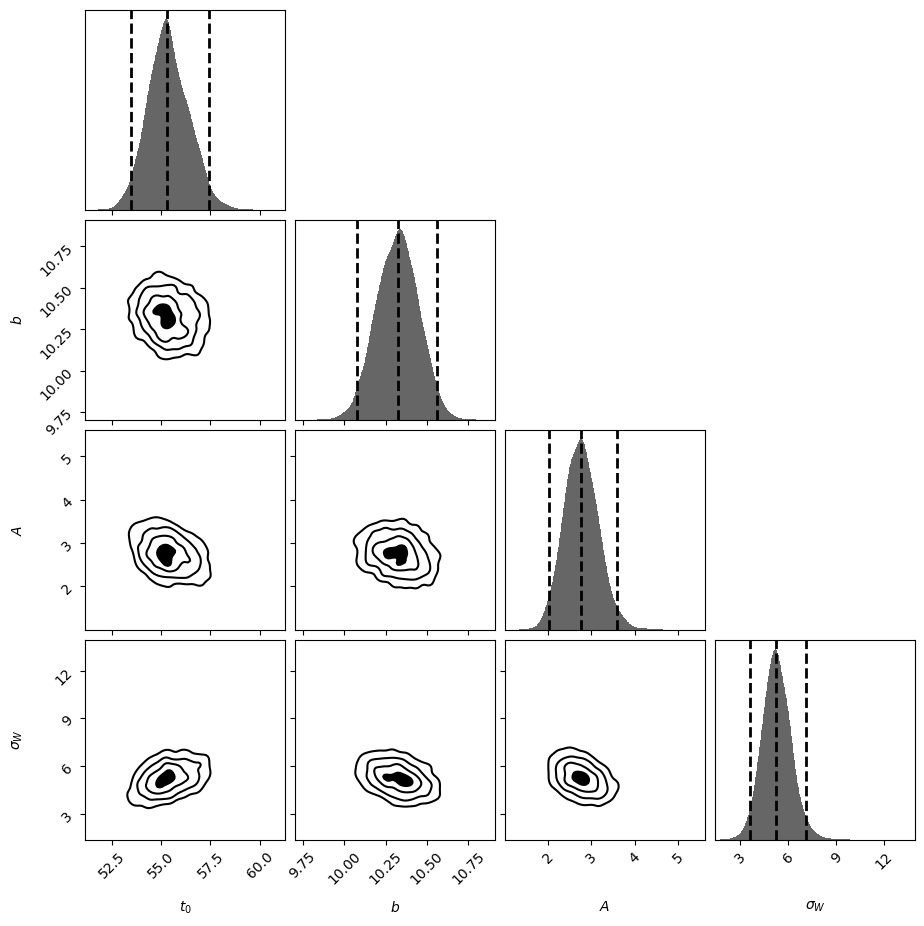

In [11]:
# corner plot for the parameters
cfig, caxes = dyplot.cornerplot(results2,labels=labels2)

In [12]:
# Extract sampling results
samples2 = results2.samples  # samples
weights2 = np.exp(results2.logwt - results2.logz[-1])  # normalized weights

evidence2 = results2.logz[-1] #evidence
print(f'Bayesian evidence: {np.exp(evidence)}\nlog(Bayesian evidence): {evidence:.2f}')


quantiles2 = [dyfunc.quantile(samps, [0.16, 0.84], weights=weights2)
             for samps in samples2.T]
print('68% parameter credible regions are:\n ' + str(quantiles2) + '\n')

mean2, cov2 = dyfunc.mean_and_cov(samples2, weights2)
print('Mean and covariance of parameters are: ' + str(mean2) + '\n' + str(cov2))

Bayesian evidence: 1.70795687583649e-68
log(Bayesian evidence): -156.04
68% parameter credible regions are:
 [[54.34916604173544, 56.42469702640701], [10.19560210365131, 10.44655378431736], [2.3769352551721727, 3.1577854689127265], [4.428553193956138, 6.108655054598292]]

Mean and covariance of parameters are: [55.3648154  10.32263806  2.76603853  5.28060256]
[[ 1.0628766  -0.02326638 -0.14393879  0.34043295]
 [-0.02326638  0.01558644 -0.01012522 -0.04204132]
 [-0.14393879 -0.01012522  0.15584783 -0.14910105]
 [ 0.34043295 -0.04204132 -0.14910105  0.78306398]]


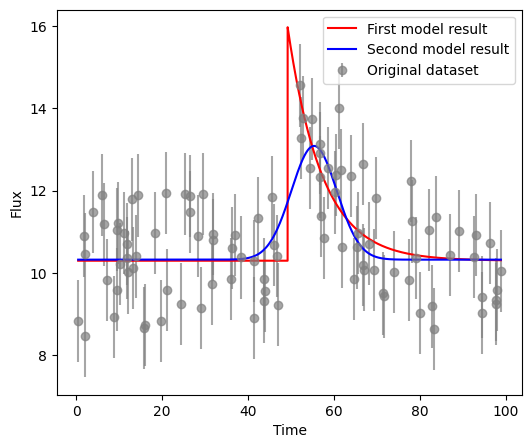

In [13]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
ax.errorbar(time,flux,yerr=flux_err,marker='o',color='grey',alpha=0.7,linestyle='',label='Original dataset')

x=np.linspace(min(time),max(time),10000)
ax.plot(x,func(x,mean),color='red',linestyle='-',label='First model result')
ax.plot(x,func2(x,mean2),color='blue',linestyle='-',label='Second model result')

ax.set(xlabel='Time',ylabel='Flux')
ax.legend()

In [14]:
# computing the Jeffreys ratio and printing the corresponding result using the Jeffreys scale
log_diff = evidence - evidence2
print(f'The log-evidence difference (model1 - model2) is {log_diff:.3f}')
if(log_diff>=5):
    print("The first model is strongly favoured")
elif(3<=log_diff<5):
    print("The first model is favoured")
elif(1<=log_diff<3):
    print("The first model is slightly favoured")
elif(-1<log_diff<1):
    print("No conclusion can be drawn")
elif(-3<log_diff<=-1):
    print("The second model is slightly favoured")
elif(-5<log_diff<=-3):
    print("The second model is favoured")
elif(log_diff<=-5):
    print("The second model is strongly favoured")

The log-evidence difference (model1 - model2) is 5.233
The first model is strongly favoured
